In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 경로 설정 
import os
os.chdir('/content/drive/MyDrive/A2W/데이터/data_submission')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from lightgbm import LGBMClassifier

In [4]:
df = pd.read_csv('tree_sum_all.xls.csv', encoding = 'cp949')

In [5]:
df

,umd,sgg,umd2,landslide,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,DNST_CD,HEIGHT
0,부계면,군위군,군위군 부계면,0,1,2,1,11,2,4,C,12
1,우보면,군위군,군위군 우보면,0,1,2,1,11,2,4,C,12
2,산성면,군위군,군위군 산성면,0,1,2,1,11,2,4,C,12
3,신녕면,영천시,영천시 신녕면,0,1,2,2,30,1,3,C,10
4,화산면,영천시,영천시 화산면,0,1,2,2,30,1,3,C,10
...,...,...,...,...,...,...,...,...,...,...,...,...
620,야로면,합천군,합천군 야로면,1,1,2,1,11,2,5,C,12
621,묘산면,합천군,합천군 묘산면,1,1,2,2,34,2,5,C,12
622,덕곡면,합천군,합천군 덕곡면,0,1,2,1,11,2,4,C,12
623,청덕면,합천군,합천군 청덕면,1,1,2,1,11,2,4,C,12


In [7]:
df_sample = df.drop(['umd', "sgg", "DNST_CD", "umd2"], axis=1)

In [9]:
df_sample = df_sample.dropna()
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625 entries, 0 to 624
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   landslide   625 non-null    int64
 1   STORUNST    625 non-null    int64
 2   FROR_CD     625 non-null    int64
 3   FRTP_CD     625 non-null    int64
 4   KOFTR_GROU  625 non-null    int64
 5   DMCLS_CD    625 non-null    int64
 6   AGCLS_CD    625 non-null    int64
 7   HEIGHT      625 non-null    int64
dtypes: int64(8)
memory usage: 43.9 KB


In [10]:
df_sample.columns

Index(['landslide', 'STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD',
       'AGCLS_CD', 'HEIGHT'],
      dtype='object')

In [11]:
df_sample.value_counts("landslide")

landslide
0    385
1    240
dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    df_sample[['STORUNST', 'FROR_CD', 'FRTP_CD', 'KOFTR_GROU', 'DMCLS_CD',
       'AGCLS_CD', 'HEIGHT']], 
    df_sample['landslide'], 
    test_size=0.25, 
    stratify=df_sample['landslide'], 
    random_state=123456)

In [13]:
x_train

,STORUNST,FROR_CD,FRTP_CD,KOFTR_GROU,DMCLS_CD,AGCLS_CD,HEIGHT
165,1,2,1,11,2,5,16
140,1,2,1,11,2,4,14
6,1,2,1,11,2,4,12
142,1,2,1,15,2,4,12
129,2,0,0,82,0,0,0
...,...,...,...,...,...,...,...
451,1,2,2,34,2,5,16
309,1,2,1,11,2,4,12
353,1,2,1,11,2,4,10
312,1,2,1,11,3,5,14


In [14]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123456,
                       verbose=0, warm_start=False)

In [15]:
from sklearn.metrics import accuracy_score

predicted = rf.predict(x_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.63
Mean accuracy score: 0.65


In [16]:
predicted

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1])

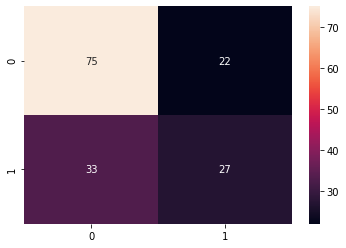

In [17]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)